<a href="https://colab.research.google.com/github/Swayyum/Intro-to-ML--4105/blob/main/HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_squared_error
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path = '/content/drive/My Drive/Intro to ML Collab/Datasets/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))

In [3]:
# Making non-binary values binary
yes_no_mapping = {'yes': 1, 'no': 0}
furnishing_mapping = {'furnished': 1, 'semi-furnished': 0, 'unfurnished': 0}
yes_no_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
furnishing_columns = ['furnishingstatus']
housing[yes_no_columns] = housing[yes_no_columns].applymap(yes_no_mapping.get)
housing[furnishing_columns] = housing[furnishing_columns].applymap(furnishing_mapping.get)

In [4]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1


In [58]:
#X1 = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']]
X1 = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']]
y1 = housing['price'].values.reshape(-1,1)
#y1 = housing['price']

In [59]:
print("nan:", housing.isna().sum().sum())

nan: 0


In [60]:
from sklearn.model_selection import train_test_split
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_val_scaled = scaler.transform(X1_val)

X_train_tensor = torch.tensor(X1_train_scaled, dtype = torch.float32)
X_val_tensor = torch.tensor(X1_val_scaled, dtype = torch.float32)

In [62]:
y_train_tensor = torch.tensor(y1_train, dtype=torch.float32)
y_val_tensor = torch.tensor(y1_val, dtype=torch.float32)

Problem 1a: 1 hidden layer

In [63]:
model = nn.Sequential(
    nn.Linear(X1_train.shape[1], 32),
    nn.ReLU(),
    nn.Linear(32, 1)
)
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [64]:
def training_loop(n_epochs, optimizer, model, loss_fn, X_train, y_train, X_val, y_val):
    train_losses = []
    val_losses = []

    for epoch in range(1, n_epochs + 1):
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)

        with torch.no_grad():
            y_val_pred = model(X_val)
            val_loss = loss_fn(y_val_pred, y_val)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_losses.append(loss.detach().item())
        val_losses.append(val_loss.detach().item())


        if epoch == 1 or epoch % 100 == 0:
            print(f"Epoch {epoch}, Training loss {loss.item():.4f}, Validation loss {val_loss.item():.4f}")

    return train_losses, val_losses

# Model
train_losses1, val_losses1 = training_loop(
    n_epochs = 50000,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    X_train = X_train_tensor,
    y_train = y_train_tensor,
    X_val = X_val_tensor,
    y_val = y_val_tensor
)

Epoch 1, Training loss 26469982011392.0000, Validation loss 25189244993536.0000
Epoch 100, Training loss 26341837635584.0000, Validation loss 25062839156736.0000
Epoch 200, Training loss 25819260911616.0000, Validation loss 24550603489280.0000
Epoch 300, Training loss 24912076996608.0000, Validation loss 23661102759936.0000
Epoch 400, Training loss 23681107492864.0000, Validation loss 22455427006464.0000
Epoch 500, Training loss 22193366892544.0000, Validation loss 21002111156224.0000
Epoch 600, Training loss 20519705378816.0000, Validation loss 19372185747456.0000
Epoch 700, Training loss 18731572920320.0000, Validation loss 17632432488448.0000
Epoch 800, Training loss 16891405926400.0000, Validation loss 15842655862784.0000
Epoch 900, Training loss 15048747515904.0000, Validation loss 14055258456064.0000
Epoch 1000, Training loss 13253836013568.0000, Validation loss 12324872126464.0000
Epoch 1100, Training loss 11551768576000.0000, Validation loss 10698518167552.0000
Epoch 1200, Trai

Problem 1b: 2 hidden layers

In [46]:
model1 = nn.Sequential(
    nn.Linear(X1_train.shape[1], 32),
    nn.ReLU(),
    nn.Linear(32, 64),
    nn.ReLU(),
    nn.Linear(64, 16),
    nn.ReLU(),
    nn.Linear(16, 1)
)

In [65]:
optimizer1 = optim.Adam(model1.parameters(), lr=1e-4)


train_losses2, val_losses2 = training_loop(
    n_epochs = 50000,
    optimizer = optimizer1,  # Use the new optimizer
    model = model1,
    loss_fn = loss_fn,
    X_train = X_train_tensor,
    y_train = y_train_tensor,
    X_val = X_val_tensor,
    y_val = y_val_tensor
)

Epoch 1, Training loss 26283924783104.0000, Validation loss 25017523896320.0000
Epoch 100, Training loss 26275552952320.0000, Validation loss 25009793794048.0000
Epoch 200, Training loss 26266675707904.0000, Validation loss 25001593929728.0000
Epoch 300, Training loss 26257353867264.0000, Validation loss 24992983023616.0000
Epoch 400, Training loss 26247572750336.0000, Validation loss 24983965270016.0000
Epoch 500, Training loss 26237313482752.0000, Validation loss 24974498725888.0000
Epoch 600, Training loss 26226557190144.0000, Validation loss 24964581294080.0000
Epoch 700, Training loss 26215293386752.0000, Validation loss 24954194100224.0000
Epoch 800, Training loss 26203505295360.0000, Validation loss 24943320367104.0000
Epoch 900, Training loss 26191171944448.0000, Validation loss 24931945414656.0000
Epoch 1000, Training loss 26178276556800.0000, Validation loss 24920052465664.0000
Epoch 1100, Training loss 26164802355200.0000, Validation loss 24907635228672.0000
Epoch 1200, Trai

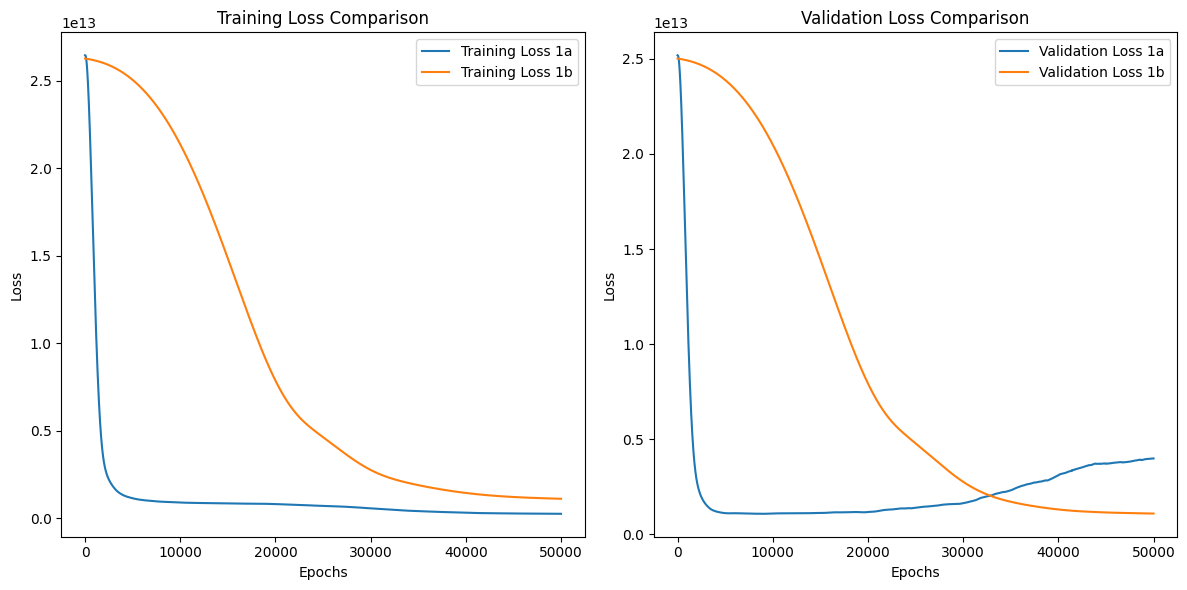

In [66]:
epochs = range(1, len(train_losses1) + 1)

plt.figure(figsize=(12, 6))

# Plot training losses
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses1, label='Training Loss 1a')
plt.plot(epochs, train_losses2, label='Training Loss 1b')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot validation losses
plt.subplot(1, 2, 2)
plt.plot(epochs, val_losses1, label='Validation Loss 1a')
plt.plot(epochs, val_losses2, label='Validation Loss 1b')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()